# Recursive feature elimination with cross-validation

A Recursive Feature Elimination (RFE) example with automatic tuning of the number of features selected with cross-validation.

In [60]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

## Model Training and Selection

In [61]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 5  # Minimum number of features to consider
clf = RidgeClassifier()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 28


## Plot number of features versus cross-validation scores

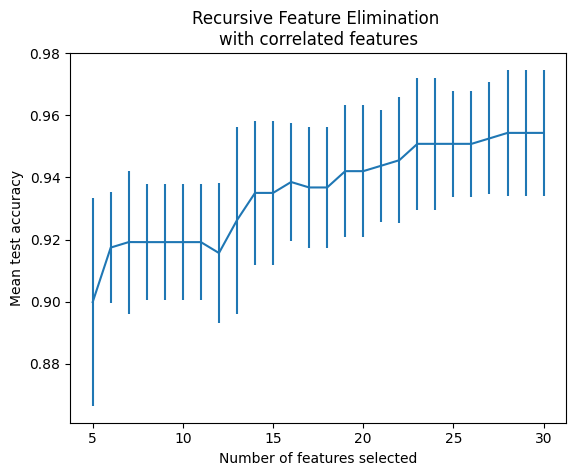

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

From the plot above one can further notice a plateau of equivalent scores (similar mean value and overlapping errorbars) for 28 to 30 selected features. This is the result of introducing correlated features. Indeed, the optimal model selected by the RFE can lie within this range, depending on the cross-validation technique. The test accuracy increases as we increase the features, this is, using less features leads to over-fitting and is therefore detrimental for the statistical performance of the models.